In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix

In [2]:
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1)

X, y = mnist.data, mnist.target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [3]:
svm_clf = SVC(kernel='rbf', gamma='scale') 

svm_clf.fit(X_train, y_train)

y_pred = svm_clf.predict(X_test)

In [4]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
report = classification_report(y_test, y_pred)

In [5]:
print(f"Accuracy of SVM: {accuracy * 100:.2f}%")
print("Confusion Matrix:\n", conf_matrix)
print("Classification Report:\n", report)

Accuracy of SVM: 96.30%
Confusion Matrix:
 [[1310    1    5    1    0    5   11    5    5    0]
 [   0 1580    8    2    1    0    0    5    3    1]
 [   3    8 1323    8    8    3    5   11    9    2]
 [   1    3   15 1362    3   13    1   24    8    3]
 [   1    1    9    0 1247    2    5    6    3   21]
 [   2    3    3   18    2 1219   13    8    5    0]
 [   3    0    3    0    7    5 1365   10    3    0]
 [   2    4   10    1    6    1    0 1459    1   19]
 [   2    7   11   11    6   10    4   12 1290    4]
 [   5    6    6   12   20    0    0   38    6 1327]]
Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.95      0.96      0.95      1380
           3       0.96      0.95      0.96      1433
           4       0.96      0.96      0.96      1295
           5       0.97      0.96      0.96      1273
           6       0.97

In [8]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC
from sklearn.metrics import classification_report, accuracy_score

svc = SVC()

param_grid_poly = {
    'kernel': ['poly'],
    'degree': [2, 3, 4],         
    'C': [0.1, 1, 10],           
    'coef0': [0, 1, 10]          
}

grid_search_poly = GridSearchCV(SVC(), param_grid_poly, cv=5, scoring='accuracy', verbose=2, n_jobs=8)
grid_search_poly.fit(X_train, y_train)

print(f"Best Polynomial Kernel Parameters: {grid_search_poly.best_params_}")
y_pred_poly = grid_search_poly.best_estimator_.predict(X_test)
print("Polynomial Kernel - Test Accuracy:", accuracy_score(y_test, y_pred_poly))
print("Polynomial Kernel - Classification Report:\n", classification_report(y_test, y_pred_poly))



Fitting 5 folds for each of 27 candidates, totalling 135 fits
Best Polynomial Kernel Parameters: {'C': 10, 'coef0': 0, 'degree': 3, 'kernel': 'poly'}
Polynomial Kernel - Test Accuracy: 0.9765714285714285
Polynomial Kernel - Classification Report:
               precision    recall  f1-score   support

           0       0.99      0.99      0.99      1343
           1       0.99      0.99      0.99      1600
           2       0.97      0.98      0.98      1380
           3       0.98      0.96      0.97      1433
           4       0.97      0.98      0.97      1295
           5       0.98      0.98      0.98      1273
           6       0.99      0.98      0.99      1396
           7       0.98      0.97      0.97      1503
           8       0.96      0.97      0.97      1357
           9       0.96      0.96      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.98      0.98     14000
weighted avg       0.98      0.98      0.98     

In [10]:
print(f"Best Polynomial Kernel Cross-Validation Accuracy: {grid_search_poly.best_score_}")

Best Polynomial Kernel Cross-Validation Accuracy: 0.9761071428571428


In [22]:
#RBF Kernel with 35000  samples

In [20]:
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report

X_train_small, _, y_train_small, _ = train_test_split(X_train, y_train, train_size=35000, random_state=42, stratify=y_train)


X_test = X_test  
y_test = y_test

param_grid_rbf = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.001, 0.0001]
}

svm_rbf = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, n_jobs=8, verbose=2)
grid_search_rbf.fit(X_train_small, y_train_small)


print(f"Best parameters for RBF kernel: {grid_search_rbf.best_params_}")
print(f"Best estimator for RBF kernel: {grid_search_rbf.best_estimator_}")

print(f"Best cross-validation accuracy for RBF kernel: {grid_search_rbf.best_score_}")

y_pred_rbf = grid_search_rbf.best_estimator_.predict(X_test)
test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Test set accuracy for RBF kernel: {test_accuracy_rbf}")

print(f"Classification report for RBF kernel:\n{classification_report(y_test, y_pred_rbf)}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RBF kernel: {'C': 100, 'gamma': 0.001}
Best estimator for RBF kernel: SVC(C=100, gamma=0.001)
Best cross-validation accuracy for RBF kernel: 0.9638857142857142
Test set accuracy for RBF kernel: 0.9656428571428571
Classification report for RBF kernel:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.99      0.98      1600
           2       0.96      0.96      0.96      1380
           3       0.97      0.96      0.96      1433
           4       0.97      0.97      0.97      1295
           5       0.96      0.96      0.96      1273
           6       0.97      0.98      0.97      1396
           7       0.94      0.97      0.95      1503
           8       0.97      0.95      0.96      1357
           9       0.96      0.95      0.95      1420

    accuracy                           0.97     14000
   macro avg       

In [24]:
#RBF kernel with whole data

In [36]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


param_grid_rbf = {
    'C': [1, 10, 100],
    'gamma': ['scale', 0.001, 0.0001]
}

svm_rbf = SVC(kernel='rbf')
grid_search_rbf = GridSearchCV(svm_rbf, param_grid_rbf, cv=5, n_jobs=8, verbose=2)
grid_search_rbf.fit(X_train, y_train)


print(f"Best parameters for RBF kernel: {grid_search_rbf.best_params_}")
print(f"Best estimator for RBF kernel: {grid_search_rbf.best_estimator_}")

print(f"Best cross-validation accuracy for RBF kernel: {grid_search_rbf.best_score_}")

y_pred_rbf = grid_search_rbf.best_estimator_.predict(X_test)
test_accuracy_rbf = accuracy_score(y_test, y_pred_rbf)
print(f"Test set accuracy for RBF kernel: {test_accuracy_rbf}")


print(f"Classification report for RBF kernel:\n{classification_report(y_test, y_pred_rbf)}")


Fitting 5 folds for each of 9 candidates, totalling 45 fits
Best parameters for RBF kernel: {'C': 100, 'gamma': 0.001}
Best estimator for RBF kernel: SVC(C=100, gamma=0.001)
Best cross-validation accuracy for RBF kernel: 0.9705
Test set accuracy for RBF kernel: 0.9705714285714285
Classification report for RBF kernel:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98      1343
           1       0.98      0.99      0.99      1600
           2       0.96      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.97      0.97      0.97      1295
           5       0.97      0.97      0.97      1273
           6       0.97      0.98      0.98      1396
           7       0.94      0.97      0.96      1503
           8       0.98      0.95      0.96      1357
           9       0.97      0.95      0.96      1420

    accuracy                           0.97     14000
   macro avg       0.97      0.

In [38]:
#Linear kernel

In [49]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, classification_report


param_grid_linear = {
    'C': [0.01, 0.1, 1, 10, 50]
}

svm_linear = SVC(kernel='linear')
grid_search_linear = GridSearchCV(svm_linear, param_grid_linear, cv=5, n_jobs=8, verbose=2)
grid_search_linear.fit(X_train, y_train)


print(f"Best parameters for Linear kernel: {grid_search_linear.best_params_}")
print(f"Best estimator for Linear kernel: {grid_search_linear.best_estimator_}")

print(f"Best cross-validation accuracy for Linear kernel: {grid_search_linear.best_score_}")


y_pred_linear = grid_search_linear.best_estimator_.predict(X_test)
test_accuracy_linear = accuracy_score(y_test, y_pred_linear)
print(f"Test set accuracy for Linear kernel: {test_accuracy_linear}")

print(f"Classification report for Linear kernel:\n{classification_report(y_test, y_pred_linear)}")

Fitting 5 folds for each of 5 candidates, totalling 25 fits
Best parameters for Linear kernel: {'C': 0.01}
Best estimator for Linear kernel: SVC(C=0.01, kernel='linear')
Best cross-validation accuracy for Linear kernel: 0.9410892857142856
Test set accuracy for Linear kernel: 0.9425
Classification report for Linear kernel:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97      1343
           1       0.96      0.98      0.97      1600
           2       0.92      0.93      0.93      1380
           3       0.92      0.93      0.93      1433
           4       0.93      0.95      0.94      1295
           5       0.91      0.90      0.91      1273
           6       0.97      0.96      0.97      1396
           7       0.95      0.95      0.95      1503
           8       0.94      0.90      0.92      1357
           9       0.94      0.91      0.93      1420

    accuracy                           0.94     14000
   macro avg       0.94   

In [61]:
#Comparing and picking the best kernel for SVM classifier

In [55]:
import pandas as pd

kernel_names = ['Polynomial', 'RBF', 'Linear']
test_accuracy = [0.97657, 0.97057, 0.9425]
cross_val_accuracy = [0.975, 0.9705, 0.9411]
precision_avg = [0.98, 0.97, 0.94]
recall_avg = [0.98, 0.97, 0.94]
f1_score_avg = [0.98, 0.97, 0.94]


summary_table = pd.DataFrame({
    'Kernel': kernel_names,
    'Test Accuracy': test_accuracy,
    'Cross-Val Accuracy': cross_val_accuracy,
    'Precision (avg)': precision_avg,
    'Recall (avg)': recall_avg,
    'F1-Score (avg)': f1_score_avg
})

pd.set_option('display.max_columns', None)  
pd.set_option('display.width', 1000)        

print(summary_table)

       Kernel  Test Accuracy  Cross-Val Accuracy  Precision (avg)  Recall (avg)  F1-Score (avg)
0  Polynomial        0.97657              0.9750             0.98          0.98            0.98
1         RBF        0.97057              0.9705             0.97          0.97            0.97
2      Linear        0.94250              0.9411             0.94          0.94            0.94


In [128]:
import time
from sklearn.svm import SVC

best_svc_classifier = SVC(C=10, coef0=0, degree=3, kernel='poly')

start_time_svc = time.time() 
best_svc_classifier.fit(X_train, y_train)
end_time_svc = time.time()

computational_time_svc = end_time_svc - start_time_svc

print(f"Training time for SVC: {computational_time_svc:.4f} seconds")


Training time for SVC: 100.8499 seconds


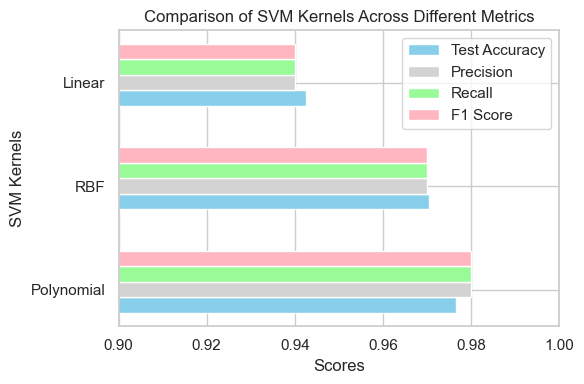

In [230]:
import numpy as np
import matplotlib.pyplot as plt

kernels = ['Polynomial', 'RBF', 'Linear']
test_accuracy = [0.97657, 0.97057, 0.94250]
precision = [0.98, 0.97, 0.94]
recall = [0.98, 0.97, 0.94]
f1_score = [0.98, 0.97, 0.94]

bar_width = 0.15
index = np.arange(len(kernels))

plt.figure(figsize=(6, 4))

plt.barh(index, test_accuracy, bar_width, label='Test Accuracy', color='skyblue')
plt.barh(index + bar_width, precision, bar_width, label='Precision', color='lightgray')
plt.barh(index + 2 * bar_width, recall, bar_width, label='Recall', color='palegreen')
plt.barh(index + 3 * bar_width, f1_score, bar_width, label='F1 Score', color='lightpink')

plt.xlim(0.9, 1.0) 

plt.xlabel('Scores')
plt.ylabel('SVM Kernels')
plt.title('Comparison of SVM Kernels Across Different Metrics')

plt.yticks(index + bar_width, kernels)

plt.legend()

plt.tight_layout()
plt.show()

In [70]:
#KNN classifier 

In [82]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import time  


mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


knn = KNeighborsClassifier(n_neighbors=3, weights='distance')

# Measuring training time
start_time = time.time()  
knn.fit(X_train_pca, y_train)  
end_time = time.time()  


training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")  


y_pred = knn.predict(X_test_pca)

accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))


Training Time: 0.0403 seconds
Test Accuracy: 97.52%
              precision    recall  f1-score   support

           0       0.98      0.99      0.99      1343
           1       0.97      0.99      0.98      1600
           2       0.98      0.97      0.97      1380
           3       0.97      0.97      0.97      1433
           4       0.98      0.97      0.97      1295
           5       0.98      0.97      0.97      1273
           6       0.98      0.99      0.99      1396
           7       0.97      0.98      0.97      1503
           8       0.99      0.95      0.97      1357
           9       0.96      0.97      0.96      1420

    accuracy                           0.98     14000
   macro avg       0.98      0.97      0.98     14000
weighted avg       0.98      0.98      0.98     14000



In [132]:
import time
from sklearn.neighbors import KNeighborsClassifier

best_knn_classifier = KNeighborsClassifier(weights='distance', n_neighbors=3)

start_time_knn = time.time()
best_knn_classifier.fit(X_train, y_train)  
end_time_knn = time.time()

computational_time_knn = end_time_knn - start_time_knn

print(f"Training time for KNN: {computational_time_knn:.4f} seconds")


Training time for KNN: 0.2565 seconds


In [72]:
#SGD classifier results

In [84]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import time 


mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


pca = PCA(n_components=0.95)  
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


scaler = StandardScaler()
sgd_clf = Pipeline([
    ('scaler', scaler),
    ('sgd', SGDClassifier(random_state=42, early_stopping=True, 
                          loss='hinge', alpha=0.0001, eta0=0.01, 
                          learning_rate='optimal', penalty='elasticnet', max_iter=1000))
])

# Measuring training time
start_time = time.time() 
sgd_clf.fit(X_train_pca, y_train)  
end_time = time.time()  


training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")  


y_pred = sgd_clf.predict(X_test_pca)


accuracy = accuracy_score(y_test, y_pred)
print(f"Test Accuracy: {accuracy * 100:.2f}%")

print(classification_report(y_test, y_pred))

Training Time: 2.2162 seconds
Test Accuracy: 90.16%
              precision    recall  f1-score   support

           0       0.99      0.94      0.96      1343
           1       0.98      0.95      0.97      1600
           2       0.90      0.90      0.90      1380
           3       0.90      0.88      0.89      1433
           4       0.92      0.88      0.90      1295
           5       0.87      0.83      0.85      1273
           6       0.96      0.93      0.94      1396
           7       0.95      0.91      0.93      1503
           8       0.73      0.90      0.81      1357
           9       0.87      0.88      0.87      1420

    accuracy                           0.90     14000
   macro avg       0.90      0.90      0.90     14000
weighted avg       0.91      0.90      0.90     14000



In [134]:
import time
from sklearn.linear_model import SGDClassifier

best_sgd_classifier = SGDClassifier(
    alpha=0.0001,
    eta0=0.01,
    learning_rate='optimal',
    loss='hinge',
    max_iter=1000,
    penalty='elasticnet',
    random_state=42  
)

start_time_sgd = time.time()
best_sgd_classifier.fit(X_train, y_train)  
end_time_sgd = time.time()

computational_time_sgd = end_time_sgd - start_time_sgd

print(f"Training time for SGD: {computational_time_sgd:.4f} seconds")

Training time for SGD: 24.3875 seconds


In [76]:
#Random Forest classifier results

In [86]:
import numpy as np
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.decomposition import PCA
import time 


mnist = fetch_openml('mnist_784', version=1)

X, y = mnist["data"], mnist["target"]
y = y.astype(np.int64)


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train / 255.0
X_test = X_test / 255.0

X_train = X_train.to_numpy()
X_test = X_test.to_numpy()


pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)


best_rf = RandomForestClassifier(
    bootstrap=False, 
    max_depth=None, 
    min_samples_leaf=1, 
    min_samples_split=2, 
    n_estimators=200, 
    random_state=42
)

# Measuring training time
start_time = time.time()  
best_rf.fit(X_train_pca, y_train)  
end_time = time.time()  


training_time = end_time - start_time
print(f"Training Time: {training_time:.4f} seconds")  


y_pred_rf = best_rf.predict(X_test_pca)


accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Test Accuracy: {accuracy_rf * 100:.2f}%")

print(classification_report(y_test, y_pred_rf))

Training Time: 280.8843 seconds
Random Forest Test Accuracy: 95.44%
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      1343
           1       0.98      0.98      0.98      1600
           2       0.94      0.96      0.95      1380
           3       0.93      0.94      0.94      1433
           4       0.94      0.96      0.95      1295
           5       0.94      0.94      0.94      1273
           6       0.97      0.98      0.97      1396
           7       0.96      0.96      0.96      1503
           8       0.94      0.91      0.93      1357
           9       0.95      0.93      0.94      1420

    accuracy                           0.95     14000
   macro avg       0.95      0.95      0.95     14000
weighted avg       0.95      0.95      0.95     14000



In [138]:
import time
from sklearn.ensemble import RandomForestClassifier

best_forest_classifier = RandomForestClassifier(
    bootstrap=False,         
    max_depth=None,         
    min_samples_leaf=1,     
    min_samples_split=2,     
    n_estimators=200,       
    random_state=42         
)

start_time_forest = time.time()
best_forest_classifier.fit(X_train, y_train)  
end_time_forest = time.time()

computational_time_forest = end_time_forest - start_time_forest

print(f"Training time for Random Forest: {computational_time_forest:.4f} seconds")


Training time for Random Forest: 91.7497 seconds


In [88]:
#Comparision between SVM,KNN,SGD and random forest

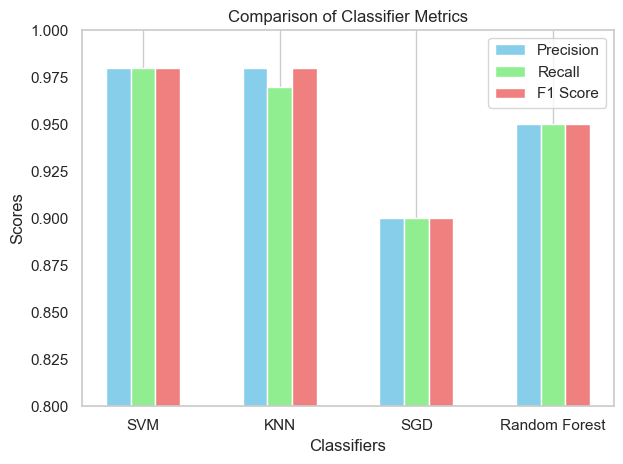

In [194]:
import numpy as np
import matplotlib.pyplot as plt

classifiers = ['SVM', 'KNN', 'SGD', 'Random Forest']

precision_scores = [0.98, 0.98, 0.90, 0.95]
recall_scores = [0.98, 0.97, 0.90, 0.95]
f1_scores = [0.98, 0.98, 0.90, 0.95]

bar_width = 0.18
x = np.arange(len(classifiers))

plt.bar(x, precision_scores, width=bar_width, label='Precision', color='skyblue', align='center')
plt.bar(x + bar_width, recall_scores, width=bar_width, label='Recall', color='lightgreen', align='center')
plt.bar(x + 2 * bar_width, f1_scores, width=bar_width, label='F1 Score', color='lightcoral', align='center')

plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Comparison of Classifier Metrics')
plt.xticks(x + bar_width, classifiers)

plt.ylim(0.8, 1.0)  

plt.legend()
plt.grid(axis='y')

plt.tight_layout()

plt.show()


In [140]:
#chart for training time metrics

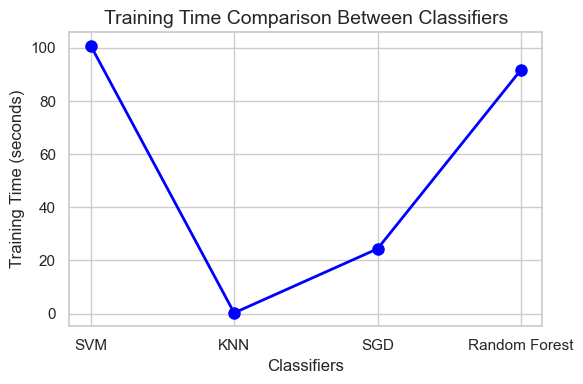

In [152]:
plt.figure(figsize=(6, 4))
plt.plot(classifiers, training_times, marker='o', color='blue', linestyle='-', linewidth=2, markersize=8)

plt.title('Training Time Comparison Between Classifiers', fontsize=14)
plt.xlabel('Classifiers', fontsize=12)
plt.ylabel('Training Time (seconds)', fontsize=12)

plt.tight_layout()
plt.show()